In [36]:
from openai import OpenAI
import json, os, sys
import os
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### Load answers

In [8]:
source_filename = "../data/processed/UN_data.json"
des_filename = "../data/processed/UN_data_with_narrative_answers.json"

# Load articles
with open(source_filename, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# Load questions
with open('../data/processed/narrative_questions.json', 'r', encoding='utf-8') as f:
    questions = json.load(f)

#print number of questions
print("Number of questions:", len(questions))

# Set API key
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
)

Number of questions: 6


In [10]:
def get_answers(article, questions, model):
    article_content = article.get('text')
    print(f"Proceeding article")
    pre = "You are an AI trained to understand speeches and generate concise answers to multiple-choice questions based on the content. \
        Please read the following speech carefully. After reading, answer ALL the questions listed below. \
            Your answers must be in capital letters and formatted as a single string, where each question number is followed by its corresponding answer letter. \
                Separate each question-answer pair with a semicolon. \
                    Example format: 1A;2B;3C;4D;... \n\n"

    prompt = pre + f"Speech Content:\n{article_content}\n\n Questions: {questions}\n"
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": prompt}
            ],
            temperature=0
        )
    except Exception as e:
        print(f"Error: {e}")
    return response

In [11]:
def convert_string_to_dict(answer_string):
    if answer_string == "":
        return {}
    if answer_string[-1] == ';':
        answer_string = answer_string[:-1]
    return {item[:-1]: item[-1] for item in answer_string.split(';')}

results = []
iteration = 0
max_iteration = len(articles)

for article in articles:

    answers = get_answers(article, questions, model="gpt-4o")

    pure_answers = answers.choices[0].message.content
    print(pure_answers)

    # convert string to dictionary 1A;2B;3C;44D to {'1': 'A', '2': 'B', '3': 'C', '44': 'D'}
    processed_answers = convert_string_to_dict(pure_answers)
    article['Narrative_answers']= processed_answers

    results.append(article)
    iteration += 1
    print(f"Processed {iteration} out of {max_iteration}")


# Save results to a JSON file
with open(des_filename, 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

Proceeding article
1C;2A;3C;4A;5A;6A
Processed 1 out of 33
Proceeding article
1C;2A;3B;4A;5A;6A
Processed 2 out of 33
Proceeding article
1C;2A;3A;4A;5A;6A
Processed 3 out of 33
Proceeding article
1A;2B;3C;4C;5C;6C
Processed 4 out of 33
Proceeding article
1C;2C;3C;4C;5C;6C
Processed 5 out of 33
Proceeding article
1C;2B;3B;4A;5A;6C
Processed 6 out of 33
Proceeding article
1A;2A;3C;4B;5A;6A
Processed 7 out of 33
Proceeding article
1A;2A;3C;4A;5A;6A
Processed 8 out of 33
Proceeding article
1A;2A;3B;4A;5A;6A
Processed 9 out of 33
Proceeding article
1B;2A;3B;4B;5A;6A
Processed 10 out of 33
Proceeding article
1B;2A;3B;4A;5A;6A
Processed 11 out of 33
Proceeding article
1A;2A;3A;4A;5A;6A
Processed 12 out of 33
Proceeding article
1C;2A;3C;4A;5A;6C
Processed 13 out of 33
Proceeding article
1C;2A;3C;4A;5A;6A
Processed 14 out of 33
Proceeding article
1C;2A;3B;4A;5A;6A
Processed 15 out of 33
Proceeding article
1C;2B;3C;4A;5A;6A
Processed 16 out of 33
Proceeding article
1A;2A;3A;4B;5A;6A
Processed 17

In [30]:
updated_json = "../data/processed/UN_data_with_narrative_answers.json"
with open(updated_json, 'r', encoding='utf-8') as f:
    articles = json.load(f)

articles[0]

{'session': 60,
 'year': 2005,
 'country': 'FRA',
 'text': 'Speaking for the first time from this rostrum, I wish to\nreaffirm here the importance France attaches to the\nmultilateral system. Our common future cannot be\nenvisaged without strengthening it.\nThe declaration adopted the day before yesterday\nis a milestone in that direction, even if it does not meet\nall our expectations. Indeed, the text makes some\nsignificant advances. I am thinking in particular of\ninnovative financing for development. I am also\nthinking of the decision to establish a peacebuilding\ncommission within the Security Council. Finally, I am\nthinking of the establishment of a Human Rights\nCouncil and the endorsement of the principle of the\nresponsibility to protect. Now it is up to us to put those\nnew concepts into practice.\nIn that connection, I wish to pay tribute here to\nthe remarkable work that has been done under the\nstewardship of Mr. Jean Ping.\nBut let us not underestimate the extent of th

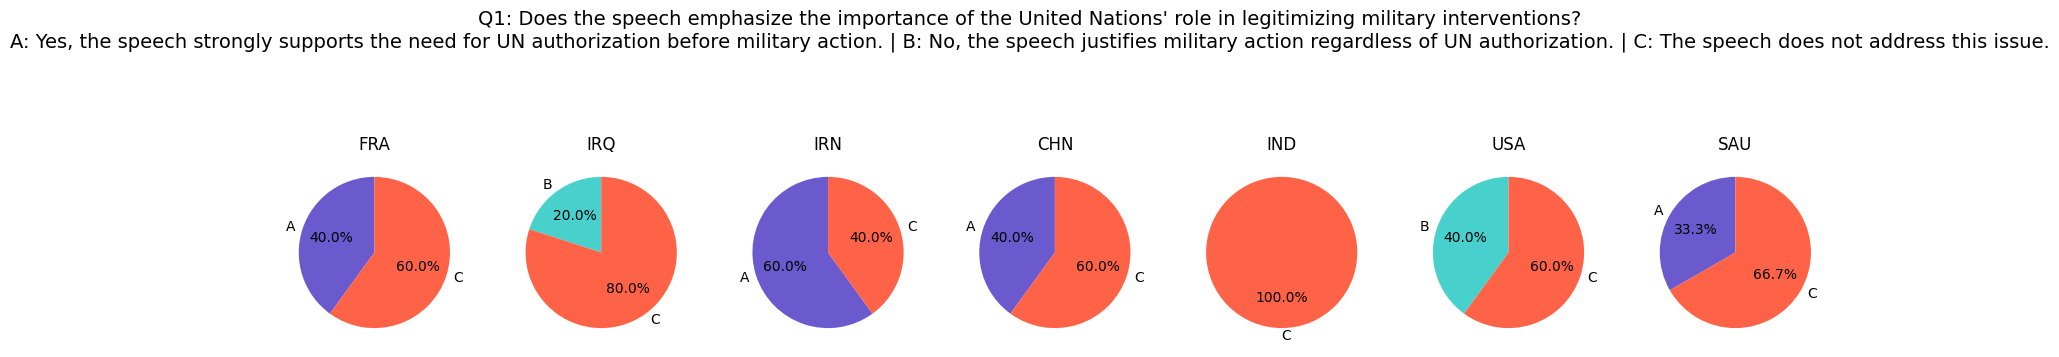

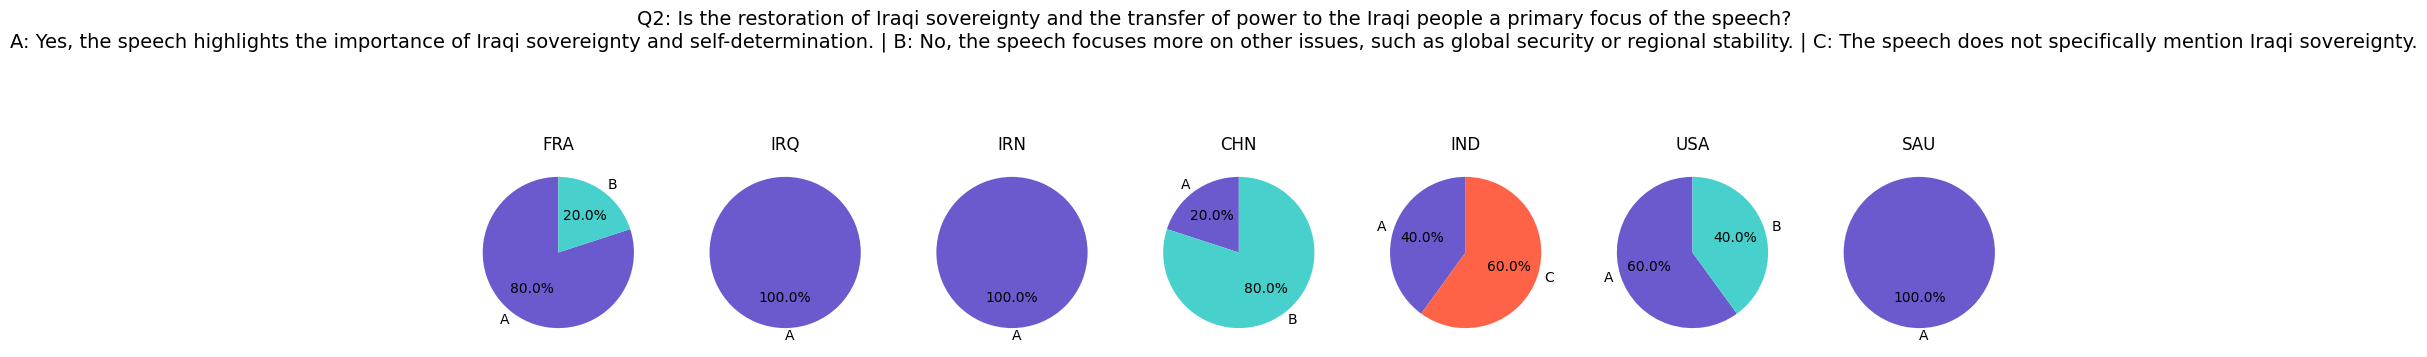

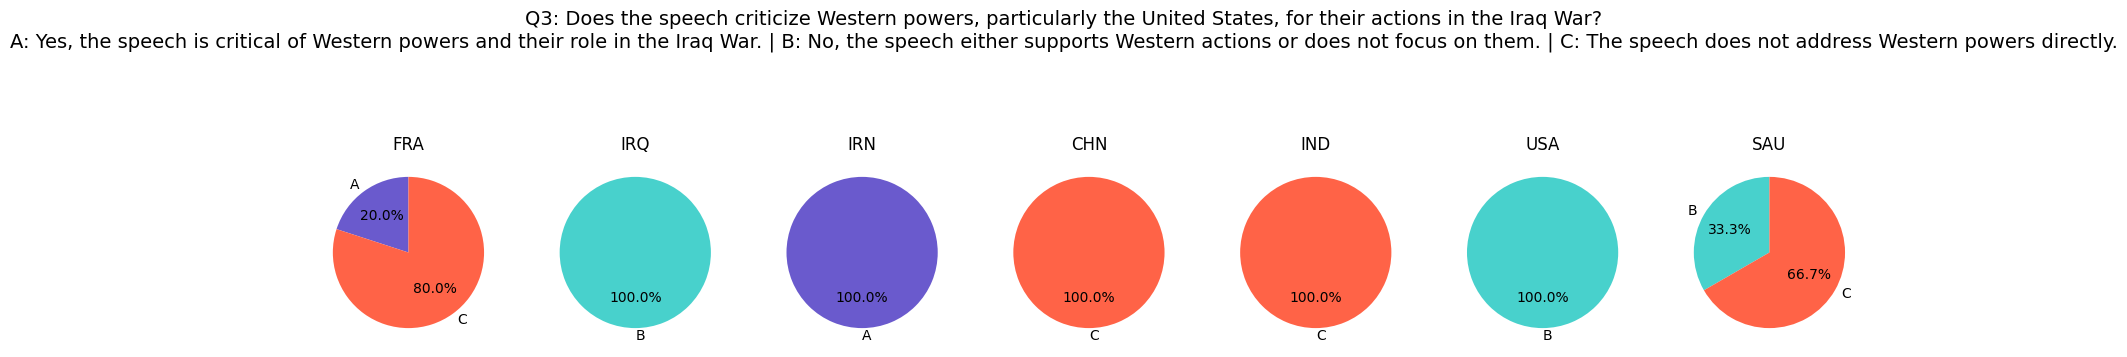

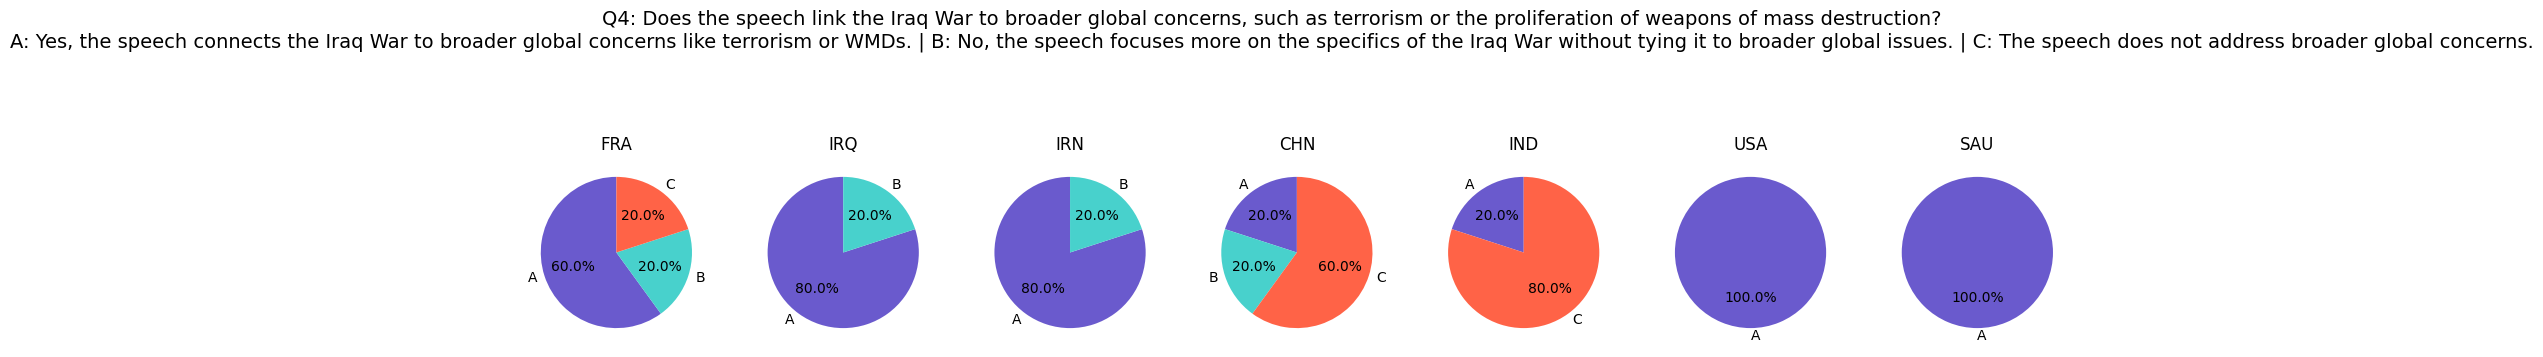

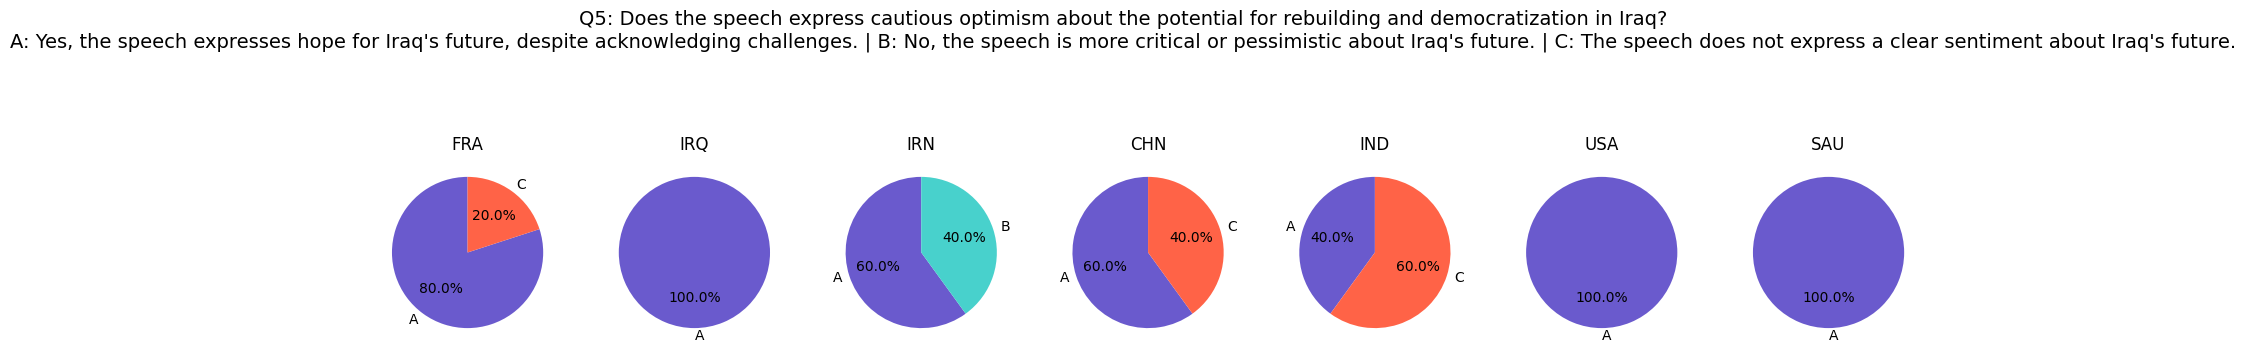

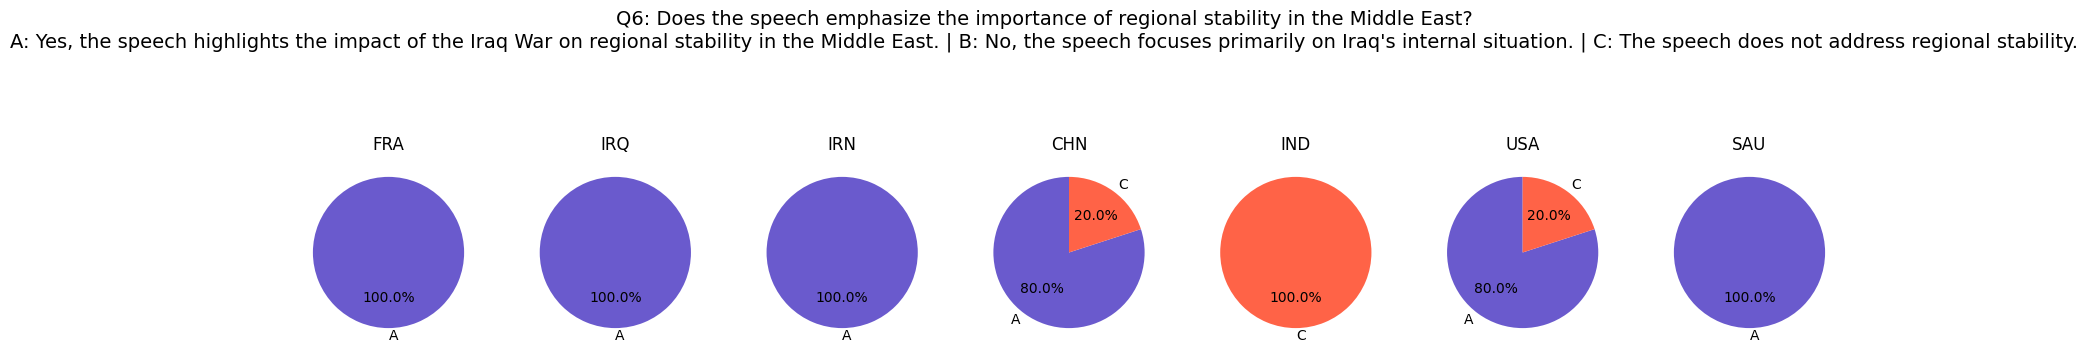

In [34]:
# Load the data and questions JSON (assuming these are loaded correctly)

questions_data = {
    "Q1": {
        "question": "Does the speech emphasize the importance of the United Nations' role in legitimizing military interventions?",
        "choices": {
            "A": "Yes, the speech strongly supports the need for UN authorization before military action.",
            "B": "No, the speech justifies military action regardless of UN authorization.",
            "C": "The speech does not address this issue."
        }
    },
    "Q2": {
        "question": "Is the restoration of Iraqi sovereignty and the transfer of power to the Iraqi people a primary focus of the speech?",
        "choices": {
            "A": "Yes, the speech highlights the importance of Iraqi sovereignty and self-determination.",
            "B": "No, the speech focuses more on other issues, such as global security or regional stability.",
            "C": "The speech does not specifically mention Iraqi sovereignty."
        }
    },
    "Q3": {
        "question": "Does the speech criticize Western powers, particularly the United States, for their actions in the Iraq War?",
        "choices": {
            "A": "Yes, the speech is critical of Western powers and their role in the Iraq War.",
            "B": "No, the speech either supports Western actions or does not focus on them.",
            "C": "The speech does not address Western powers directly."
        }
    },
    "Q4": {
        "question": "Does the speech link the Iraq War to broader global concerns, such as terrorism or the proliferation of weapons of mass destruction?",
        "choices": {
            "A": "Yes, the speech connects the Iraq War to broader global concerns like terrorism or WMDs.",
            "B": "No, the speech focuses more on the specifics of the Iraq War without tying it to broader global issues.",
            "C": "The speech does not address broader global concerns."
        }
    },
    "Q5": {
        "question": "Does the speech express cautious optimism about the potential for rebuilding and democratization in Iraq?",
        "choices": {
            "A": "Yes, the speech expresses hope for Iraq's future, despite acknowledging challenges.",
            "B": "No, the speech is more critical or pessimistic about Iraq's future.",
            "C": "The speech does not express a clear sentiment about Iraq's future."
        }
    },
    "Q6": {
        "question": "Does the speech emphasize the importance of regional stability in the Middle East?",
        "choices": {
            "A": "Yes, the speech highlights the impact of the Iraq War on regional stability in the Middle East.",
            "B": "No, the speech focuses primarily on Iraq's internal situation.",
            "C": "The speech does not address regional stability."
        }
    }
}

# Convert the JSON data to a DataFrame
df = pd.DataFrame(articles)

# List of unique questions based on the question format in the `questions_data` dictionary
questions = questions_data.keys()

# List of countries
countries = df['country'].unique()

# Define a color map for the options A, B, C with dimmer colors
color_map = {'A': '#6A5ACD', 'B': '#48D1CC', 'C': '#FF6347'}

# Custom function to format the percentage display
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%' if pct > 0 else ''
    return my_format

# Iterate through each question
for question in questions:
    fig, axes = plt.subplots(1, len(countries), figsize=(20, 5), subplot_kw={'aspect': 'equal'})
    
    # Retrieve question text and options
    question_text = questions_data[question]['question']
    choices = questions_data[question]['choices']
    
    # Create the title including question and options
    title = f"{question}: {question_text}\n"
    title += f"A: {choices['A']} | B: {choices['B']} | C: {choices['C']}"
    
    fig.suptitle(title, fontsize=14)
    
    # Iterate through each country and plot its pie chart
    for i, country in enumerate(countries):
        # Filter the DataFrame for the current country
        country_data = df[df['country'] == country]
        
        # Get the answer for the current question and count occurrences
        answer_counts = country_data['Narrative_answers'].apply(lambda x: x[question[-1]]).value_counts()
        
        # Sort the answer_counts to ensure the order of A, B, C
        answer_counts = answer_counts.reindex(['A', 'B', 'C'], fill_value=0)
        
        # Get colors for the current pie chart
        colors = [color_map[option] for option in answer_counts.index]
        
        # Filter out labels with 0% to avoid displaying them
        labels = [f'{idx}' if value > 0 else '' for idx, value in zip(answer_counts.index, answer_counts.values)]
        
        # Plot the pie chart
        axes[i].pie(answer_counts, labels=labels, colors=colors, 
                    autopct=autopct_format(answer_counts), startangle=90)
        axes[i].set_title(country)
    
    plt.show()


### 0: China
### 1: France
### 2: India
### 3: Iran
### 4: Iraq
### 5: Saudi Arabia
### 6: USA

In [37]:
with open("../data/processed/UN_data_with_narrative_answers.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
labels = df['label'].to_list()

(33, 3)


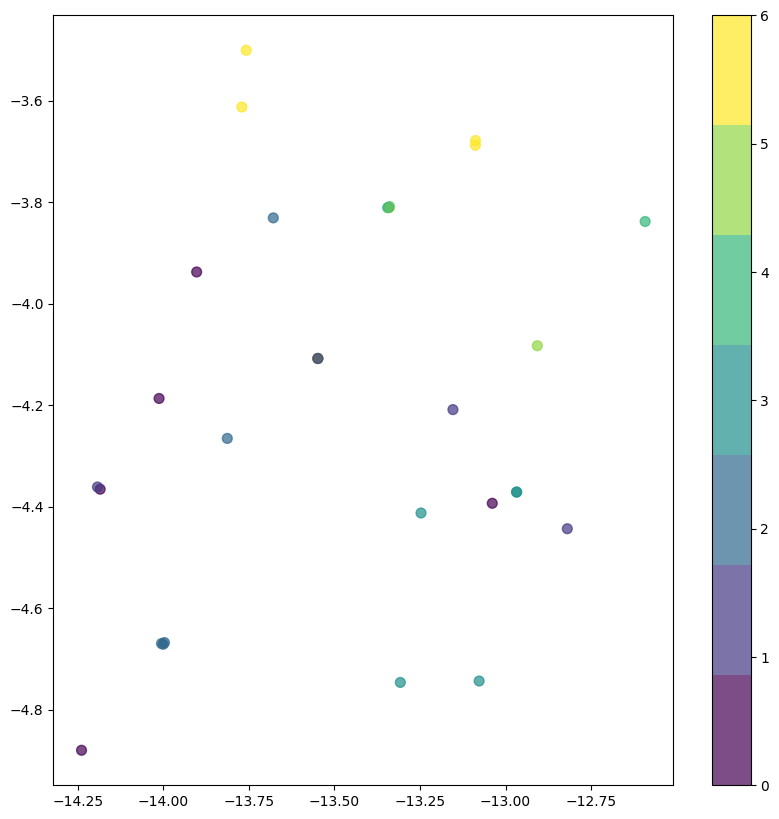

In [38]:
# Load the latent vectors
df_vectors = pd.read_csv("../data/processed/latent_vector_3.csv", header=None)
data_vectors = df_vectors.values
print(data_vectors.shape)

# Check the number of samples
n_samples = data_vectors.shape[0]

# Set the perplexity parameter to be less than the number of samples
perplexity = min(30, n_samples - 1)

# Apply TSNE to reduce the dimensions to 2D
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
v_2d = tsne.fit_transform(data_vectors)

# Create a scatter plot with different colors for each label
plt.figure(figsize=(10, 10))

# Define a colormap for 7 distinct labels (0-6)
colors = plt.get_cmap('viridis', 7)

# Plot the 2D embeddings
sc = plt.scatter(v_2d[:, 0], v_2d[:, 1], c=labels, cmap=colors, s=50, alpha=0.7)

# Adding a colorbar and adjusting to show the range of labels
cbar = plt.colorbar(sc)
cbar.set_ticks(np.arange(0, 7))
cbar.set_ticklabels(np.arange(0, 7))

plt.show()